In [9]:
import pandas as pd

In [10]:
infile = open("CDC_data.csv","r")
lines = []
headerLine = infile.readline()
headers = headerLine.strip().split(",")
#print(headers)
count = 0
while (True):
    line = infile.readline()
    if line == "":
        break;
    lines.append(line)
    count+=1
    #if (count > 1000000):
        #break
#print(lines)
ageDict = {}
ageDict2 = {}
races = ["White","Black","Multiple/Other","Asian","American Indian/Alaska Native","Native Hawaiian/Other Pacific Islander"]
ageGroups = ["18 to 49 years","50 to 64 years","0 - 17 years","65+ years"]
sexes = ["Female","Male","NA"]
for line in lines:
    tokens = line.strip().split(",")
    age_group = tokens[headers.index("age_group")]
    sex = tokens[headers.index("sex")]
    race = tokens[headers.index("race")]
    if (race in races and age_group in ageGroups):
        ageDict.setdefault(age_group,[]).append(race)
    if (sex in sexes and age_group in ageGroups):
        ageDict2.setdefault(age_group,[]).append(sex)
#print(ageDict)
#1 min 19 sec for all records

In [11]:
age_race_dict = {}
for key in ageDict:
    raceDict = {}
    for item in ageDict[key]:
        raceDict[item] = raceDict.get(item, 0) + 1
    age_race_dict[key] = raceDict
print(age_race_dict)
#5 sec for all records
#we could make a chart showing for each age group, which race has the highest counts

{'0 - 17 years': {'Black': 372493, 'Native Hawaiian/Other Pacific Islander': 5442, 'White': 1815380, 'American Indian/Alaska Native': 41228, 'Multiple/Other': 186481, 'Asian': 65984}, '18 to 49 years': {'Black': 1570111, 'Multiple/Other': 782495, 'White': 7453597, 'American Indian/Alaska Native': 142019, 'Asian': 401123, 'Native Hawaiian/Other Pacific Islander': 29674}, '50 to 64 years': {'White': 2937094, 'Black': 488366, 'American Indian/Alaska Native': 32504, 'Multiple/Other': 192711, 'Asian': 113692, 'Native Hawaiian/Other Pacific Islander': 5338}, '65+ years': {'Black': 265935, 'White': 2260857, 'American Indian/Alaska Native': 13622, 'Multiple/Other': 96735, 'Asian': 63876, 'Native Hawaiian/Other Pacific Islander': 1751}}


In [20]:
def numByRace(race):
    numDict = {}
    for key in age_race_dict:
        if (race in age_race_dict[key]):
            numDict[key]=age_race_dict[key][race]
        else:
            numDict[key]=0
    return numDict
print(numByRace('Black'))

{'0 - 17 years': 372493, '18 to 49 years': 1570111, '50 to 64 years': 488366, '65+ years': 265935}


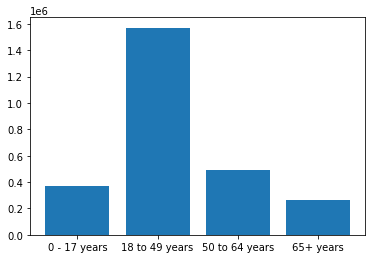

In [21]:
import matplotlib.pyplot as plt
B = numByRace('Black')

plt.bar(range(len(B)), list(B.values()), align='center')
plt.xticks(range(len(B)), list(B.keys()))

plt.show()
#Black

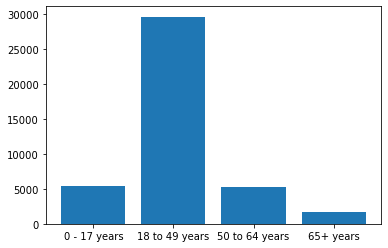

In [22]:
import matplotlib.pyplot as plt
NH = numByRace('Native Hawaiian/Other Pacific Islander')

plt.bar(range(len(NH)), list(NH.values()), align='center')
plt.xticks(range(len(NH)), list(NH.keys()))

plt.show()
#Native Hawaiian/Pacific Islander

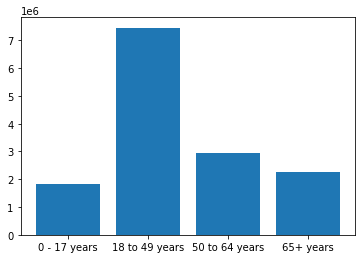

In [23]:
import matplotlib.pyplot as plt
W = numByRace('White')

plt.bar(range(len(W)), list(W.values()), align='center')
plt.xticks(range(len(W)), list(W.keys()))

plt.show()
#White

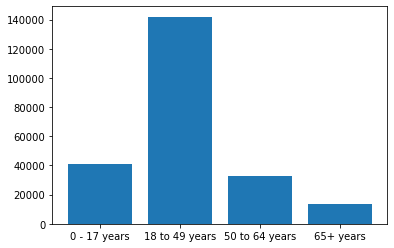

In [26]:
import matplotlib.pyplot as plt
A = numByRace('American Indian/Alaska Native')

plt.bar(range(len(A)), list(A.values()), align='center')
plt.xticks(range(len(A)), list(A.keys()))

plt.show()
#American Indian/Alaska Native

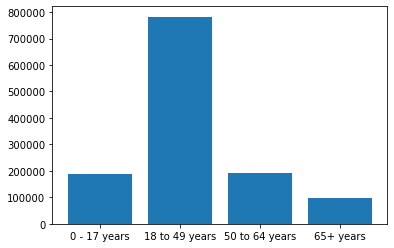

In [27]:
import matplotlib.pyplot as plt
M = numByRace('Multiple/Other')

plt.bar(range(len(M)), list(M.values()), align='center')
plt.xticks(range(len(M)), list(M.keys()))

plt.show()
#Multiple/Other

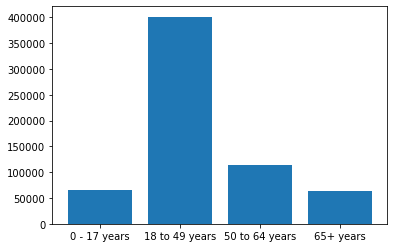

In [28]:
import matplotlib.pyplot as plt
ASI = numByRace('Asian')

plt.bar(range(len(ASI)), list(ASI.values()), align='center')
plt.xticks(range(len(ASI)), list(ASI.keys()))

plt.show()
#Asian

In [30]:
age_sex_dict = {}
for key in ageDict2:
    sexDict = {}
    for item in ageDict2[key]:
        sexDict[item] = sexDict.get(item, 0) + 1
    age_sex_dict[key] = sexDict
print(age_sex_dict)
#5 seconds for all records
#we could make a chart showing for each age group, which race has the highest counts
#if we include NA as a category, then it is unclear whether Females really have a higher count or
#if the NA + Males would give similar numbers to Females.
#So, I propose that we look at the gender data organized by ethnicity
#(eg. Black female, Black male, White female, White male etc.)

{'0 - 17 years': {'NA': 130113, 'Female': 2135687, 'Male': 2157702}, '18 to 49 years': {'NA': 250176, 'Female': 8916678, 'Male': 8014975}, '50 to 64 years': {'NA': 136797, 'Female': 3131012, 'Male': 2944134}, '65+ years': {'Female': 2152851, 'Male': 1790839, 'NA': 116998}}


In [31]:
def numBySex(race):
    numDict2 = {}
    for key in age_sex_dict:
        if (race in age_sex_dict[key]):
            numDict2[key]=age_sex_dict[key][sex]
        else:
            numDict2[key]=0
    return numDict2
print(numBySex('NA'))

{'0 - 17 years': 2157702, '18 to 49 years': 8014975, '50 to 64 years': 2944134, '65+ years': 1790839}


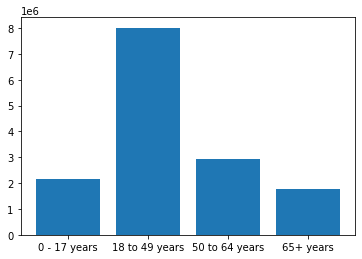

In [32]:
import matplotlib.pyplot as plt
NA = numBySex('NA')

plt.bar(range(len(NA)), list(NA.values()), align='center')
plt.xticks(range(len(NA)), list(NA.keys()))

plt.show()
#NA Gender

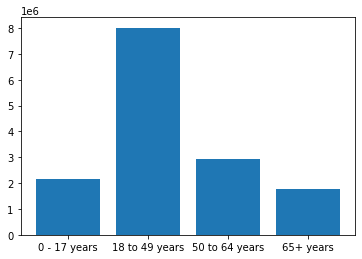

In [33]:
import matplotlib.pyplot as plt
F = numBySex('Female')

plt.bar(range(len(F)), list(F.values()), align='center')
plt.xticks(range(len(F)), list(F.keys()))

plt.show()
#Female Gender

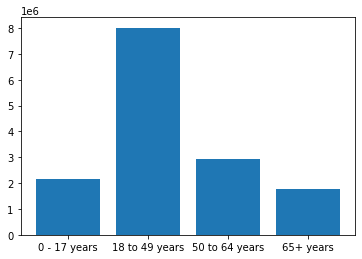

In [34]:
import matplotlib.pyplot as plt
Male = numBySex('Male')

plt.bar(range(len(Male)), list(Male.values()), align='center')
plt.xticks(range(len(Male)), list(Male.keys()))

plt.show()
#Male Gender

In [ ]:
#I think we could do resident state and ethnicity w/gender

In [ ]:
#I think we could do symptom status and gender